#### Home Credit Default Risk 

#### Imports

In [39]:
# We will import numpy and pandas for data munging
import pandas as pd
import numpy as np

# To encode categorical variables, we will import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# For plotting graphs
import matplotlib
import matplotlib.pyplot as plt # for plotting
%matplotlib inline

# To read, write and operate in a particular directory
import os

# We don't want avoid warnings and make the notebook look neat
import warnings
warnings.filterwarnings('ignore')

#### Listing Data

In [12]:
# Listing all the filenames that were given by kaggle
print(os.listdir("./data"))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [13]:
# Storing data in train and test variables

In [14]:
# Training Data. Inputing into train variable
train = pd.read_csv("./data/application_train.csv") 

# Testing Data. Inputing into test variable 
test = pd.read_csv("./data/application_test.csv")

In [15]:
# Let's checkout the first 5 rows of our dataset(train and test)

In [20]:
print(train.shape)
train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
print(test.shape)
test.head()

(48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


There is one less column in test data as there is no class(TARGET) variable in the dataset. There are 307511 rows in training data which 307511 loans. 

### Exploratory Data Analysis

In this stage, we will try to use graphs, statistics to understand the data, find missing values, check for any anomalies so on and so forth.

In [24]:
# We will start with the target variable. Since this is a bi-classification supervised learning problem, 
# we should know how the two classes are divided.
train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

This looks like they are not equally divided. Let us examine the ratio.

In [38]:
ratio = train['TARGET'].value_counts()[1]/train['TARGET'].value_counts()[0]
print("Percentage of observation who made late loan payments = {0:.2f}".format(ratio*100)+" %")
print("Percentage of observation who paid loans on time  = {0:.2f}".format((1-ratio)*100)+" %")

Percentage of observation who made late loan payments = 8.78 %
Percentage of observation who paid loans on time  = 91.22 %


As we can see this is a imbalanced class problem. This problem has to be carefully dealth with. Machine learning algorithms work well when we have a balanced dataset. We don't want or classifier to incorrectly classify people who paid loans on time into people who did not pay their loans on time. In statistics terminology, we would choose the model with fewer False Negatives.

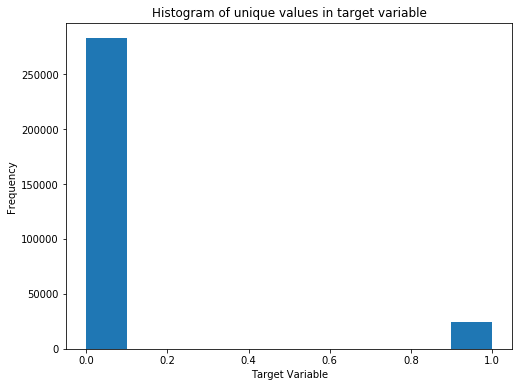

In [44]:
#plotting a histogram to visualize their difference
plt.figure(figsize = (8,6))
plt.xlabel('Target Variable')
plt.title("Histogram of unique values in target variable")
train['TARGET'].plot.hist()

### Missing Values

Next step is to deal with missing values. We will define a function which will return the percentage of missing values in each variable.

In [158]:
#  Function that returns percentage of missing values
def missing_values(df):
    
    sum_NAN = df.isnull().sum()
    
    percent_NAN = sum_NAN/len(df)*100    
    
    df_NAN = pd.concat([sum_NAN,percent_NAN], axis = 1)
    
    df_NAN.columns = ['Sum of Missing Values','Percentage']
    
    df_NAN = df_NAN[df_NAN.iloc[:,1] != 0].sort_values('Percentage' ,ascending = False)
    
    return df_NAN

In [159]:
missing_values(train)

,Sum of Missing Values,Percentage
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
